## Problem3

Perform Logistic Regression on the dataset to predict whether a candidate will win or lose the election based on factors like amount of money spent and popularity rank.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

#Importing Data
data = pd.read_csv("election_data.csv", sep = ",")


In [2]:
data.head()

,Election-id,Result,Year,Amount Spent,Popularity Rank
0,NaN,NaN,NaN,NaN,NaN
1,122.0,0.0,32.0,3.81,3.0
2,315.0,1.0,48.0,6.32,2.0
3,201.0,1.0,51.0,3.67,1.0
4,965.0,0.0,40.0,2.93,4.0


In [3]:
data.shape

(11, 5)

In [4]:
data.Result.value_counts()

1.0    6
0.0    4
Name: Result, dtype: int64

In [5]:
#removing CASENUM
c1 = data.drop('Election-id', axis = 1)

In [6]:
c1.head(10)

,Result,Year,Amount Spent,Popularity Rank
0,NaN,NaN,NaN,NaN
1,0.0,32.0,3.81,3.0
2,1.0,48.0,6.32,2.0
3,1.0,51.0,3.67,1.0
4,0.0,40.0,2.93,4.0
5,1.0,52.0,3.60,1.0
6,0.0,35.0,4.20,4.0
7,1.0,39.0,5.66,2.0
8,1.0,42.0,4.32,3.0
9,1.0,44.0,3.26,3.0


In [7]:
c1.shape

(11, 4)

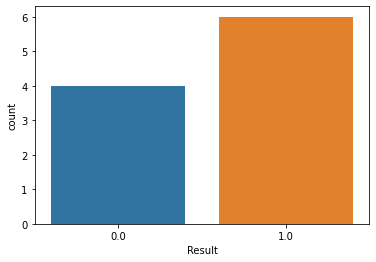

In [8]:

 
# count plot on single categorical variable
sns.countplot(x ='Result', data = c1)
 
# Show the plot
plt.show()

In [9]:
c1.describe()

,Result,Year,Amount Spent,Popularity Rank
count,10.000000,10.000000,10.000000,10.000000
mean,0.600000,43.300000,4.229000,2.700000
std,0.516398,6.912951,1.055351,1.159502
min,0.000000,32.000000,2.930000,1.000000
25%,0.000000,39.250000,3.617500,2.000000
50%,1.000000,43.000000,4.005000,3.000000
75%,1.000000,49.500000,4.470000,3.750000
max,1.000000,52.000000,6.320000,4.000000


In [10]:
c1.isna().sum()

Result             1
Year               1
Amount Spent       1
Popularity Rank    1
dtype: int64

In [13]:
#Mode for result column 
mode_Result = c1.Result.mode()
mode_Result
c1.Result = c1.Result.fillna((mode_Result)[0])
c1.Result.isna().sum()

0

In [14]:
#Mode for Year column 
mode_Year = c1.Year.mode()
mode_Year
c1.Year = c1.Year.fillna((mode_Year)[0])
c1.Year.isna().sum()

0

In [16]:
#Mode for amount column 
mode_amount = c1['Amount Spent'].mode()
mode_amount
c1['Amount Spent'] = c1['Amount Spent'].fillna((mode_amount)[0])
c1['Amount Spent'].isna().sum()


0

In [18]:
#Mode for rank column 
c1["Popularity Rank"].mode()
mode_rank = c1["Popularity Rank"].mode()
c1['Popularity Rank'] = c1['Popularity Rank'].fillna(mode_rank)

In [19]:
c1.isna().sum()

Result             0
Year               0
Amount Spent       0
Popularity Rank    0
dtype: int64

In [20]:
c1.columns

Index(['Result', 'Year', 'Amount Spent', 'Popularity Rank'], dtype='object')

In [21]:
c1.shape

(11, 4)

In [22]:
c1.corr()

,Result,Year,Amount Spent,Popularity Rank
Result,1.000000,0.324271,0.181348,-0.734651
Year,0.324271,1.000000,0.222237,-0.504871
Amount Spent,0.181348,0.222237,1.000000,-0.213832
Popularity Rank,-0.734651,-0.504871,-0.213832,1.000000


<AxesSubplot:>

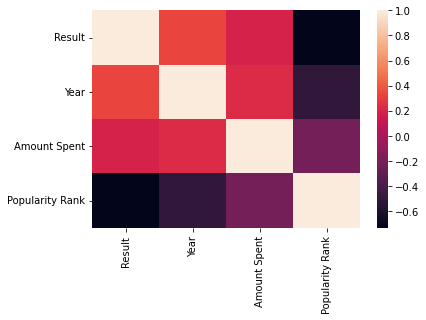

In [23]:
# check correlations in train data with a heatmap
sns.heatmap(c1.corr())

In [25]:
c1.var()

Result              0.254545
Year               54.618182
Amount Spent        1.155789
Popularity Rank     1.218182
dtype: float64

In [17]:
c1.dtypes

Result             float64
Year               float64
Amount Spent       float64
Popularity Rank    float64
dtype: object

In [26]:
c1[c1.duplicated()]

,Result,Year,Amount Spent,Popularity Rank


### Visualizations

In [27]:
c1['Popularity Rank'].value_counts()

3.0    4
4.0    3
2.0    2
1.0    2
Name: Popularity Rank, dtype: int64

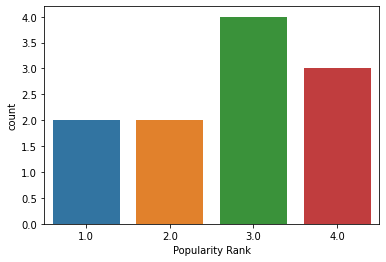

In [28]:
sns.countplot(x ='Popularity Rank', data = c1)
plt.show()

In [29]:
c1.columns

Index(['Result', 'Year', 'Amount Spent', 'Popularity Rank'], dtype='object')

In [30]:
c1.shape

(11, 4)

In [31]:
c1.iloc[:,1:].columns

Index(['Year', 'Amount Spent', 'Popularity Rank'], dtype='object')

In [32]:
c1.head()

,Result,Year,Amount Spent,Popularity Rank
0,1.0,32.0,2.93,3.0
1,0.0,32.0,3.81,3.0
2,1.0,48.0,6.32,2.0
3,1.0,51.0,3.67,1.0
4,0.0,40.0,2.93,4.0


Text(0, 0.5, 'count')

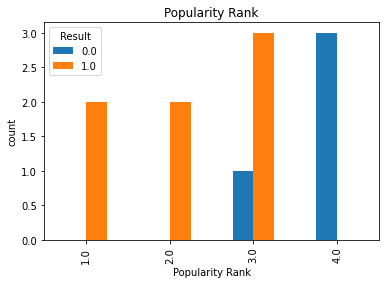

In [33]:
pd.crosstab(c1['Popularity Rank'],c1.Result).plot(kind='bar')
plt.title('Popularity Rank')
plt.ylabel('count')

In [34]:
c1.columns

Index(['Result', 'Year', 'Amount Spent', 'Popularity Rank'], dtype='object')

In [35]:
X = c1.iloc[:,1:]
y = c1.iloc[:,0]

In [38]:
c1.Result.value_counts()

1.0    7
0.0    4
Name: Result, dtype: int64

### scaling


In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [40]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0,stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [41]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Logistic Classifier

In [42]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))
y_pred_logistic = log_classifier.decision_function(X_test)

Logistic train roc-auc: 1.0
Logistic test roc-auc: 1.0


In [43]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
log_classifier=LogisticRegression()

scores = cross_val_score(log_classifier, X, y, cv=5)
scores

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


array([0.66666667, 1.        , 1.        , 1.        , 0.5       ])

In [44]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scoring = ['precision_macro', 'recall_macro']
scores = cross_validate(log_classifier, X, y, scoring=scoring, cv=5, return_estimator=True)
df= pd.DataFrame()
#sorted(scores.keys())
df['estimator'] = scores['estimator']
df['fit_time'] = scores['fit_time']
df['score_time'] = scores['score_time']
#df['test_score'] = scores['test_score']
df['precision'] = scores['test_precision_macro']
df['recall'] = scores['test_recall_macro']
df

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,estimator,fit_time,score_time,precision,recall
0,LogisticRegression(),0.004987,0.011967,0.333333,0.5
1,LogisticRegression(),0.002991,0.001995,1.000000,1.0
2,LogisticRegression(),0.003989,0.003991,1.000000,1.0
3,LogisticRegression(),0.006979,0.003990,1.000000,1.0
4,LogisticRegression(),0.003025,0.001961,0.250000,0.5


### Get the optimum threshold and plot ROC curve

In [45]:
log_classifier.fit(X_test,y_test)
final_prediction=log_classifier.predict_proba(X_test)[:,1]

In [46]:
final_prediction

array([0.30948077, 0.50901167, 0.80860351, 0.37288972])

In [47]:
X_test

array([[-0.32253366, -1.1520558 ,  1.2094158 ],
       [ 0.24512558, -0.83011873,  0.25916053],
       [ 0.81278483,  2.15511592, -0.69109474],
       [ 1.09661445,  0.39909554,  1.2094158 ]])

In [48]:
log_classifier.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.80860351, 0.80860351, 0.50901167, 0.30948077])

In [49]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
2,0.509012,0.75
3,0.309481,0.75
0,1.808604,0.50
1,0.808604,0.50


We choose the threshold 0.50 with accuracy of 0.75

In [50]:
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_test,y_pred)))

F1 Score: 0.8


In [51]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

No handles with labels found to put in legend.


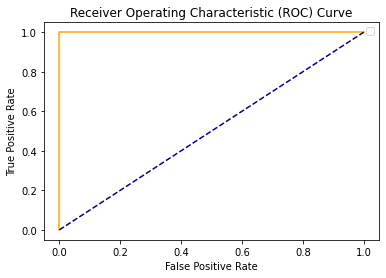

In [52]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
plot_roc_curve(fpr,tpr)

We have very less data to train and predict. Given the data we can choose the threshold 0.73 with accuracy of 0.66